In [1]:
import torch
import matplotlib.pyplot as plt

x_train = torch.tensor([[1.0], [0.0]]).reshape(-1, 1)
y_train = torch.tensor([[0.0], [1.0]]).reshape(-1, 1)

In [2]:
class NOTOperator:
    def __init__(self):
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    def logits(self, x):
        return x @ self.W + self.b

    def f(self, x):
        return torch.sigmoid(self.logits(x))
    
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x),y)

model = NOTOperator()

In [3]:
optimizer = torch.optim.SGD([model.W, model.b], 0.01)
for epoch in range (100000):
    model.loss(x_train, y_train).backward()
    optimizer.step()

    optimizer.zero_grad()

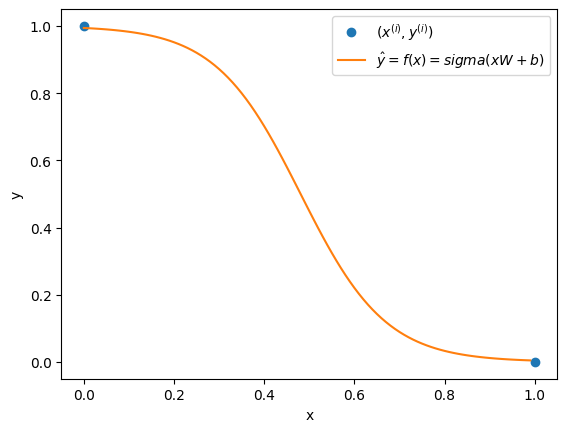

In [4]:
plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.arange(0.0, 1.0, 0.01).reshape(-1, 1)
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = sigma(xW+b)$')
plt.legend()
plt.show()